In [1]:
import json

cis_filter = False

if cis_filter:
  f = open('rankings_cis_actors.json', 'r')
else:
  f = open('rankings_actors.json', 'r')

original_data = json.load(f)
f.close()

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import joypy

In [3]:
print(original_data)

[{'strat': 'Governments', 'mu': 3.9856940949179642, 'sigma': 0.7820039157470787}, {'strat': 'Researchers and companies', 'mu': 3.057903834351394, 'sigma': 0.7804346050168929}, {'strat': 'People', 'mu': 2.5651698346657708, 'sigma': 0.7823522713771596}]


In [4]:
import scipy.stats as stats

def norm(mu, sigma, n = 1000):
  a = mu - 3*sigma
  b = mu + 3*sigma
  dist = stats.truncnorm((a - mu) / sigma, (b - mu) / sigma, loc=mu, scale=sigma)
  return dist.rvs(n)

In [5]:
# created the basic data structure that will be plotted



data = []
for i in range(len(original_data)):
  d = original_data[i]
  n = 100000
  values = norm(d['mu'], d['sigma'], n)  
  strat = str(i+1).zfill(2) + '. ' + d['strat']
  for j in range(n):
    data.append([strat, values[j]])
    
df = pd.DataFrame(data, columns=['Actor', 'Value'])
print(df)

                  Actor     Value
0       01. Governments  2.780378
1       01. Governments  2.996364
2       01. Governments  3.815928
3       01. Governments  5.023280
4       01. Governments  3.955679
5       01. Governments  3.826491
6       01. Governments  4.129480
7       01. Governments  3.545305
8       01. Governments  3.727726
9       01. Governments  3.435257
10      01. Governments  4.519639
11      01. Governments  3.701989
12      01. Governments  3.488416
13      01. Governments  4.532056
14      01. Governments  3.692056
15      01. Governments  2.932277
16      01. Governments  4.867838
17      01. Governments  3.620904
18      01. Governments  4.315391
19      01. Governments  3.819196
20      01. Governments  4.995059
21      01. Governments  3.963127
22      01. Governments  5.383105
23      01. Governments  4.702636
24      01. Governments  3.281976
25      01. Governments  3.703561
26      01. Governments  3.909828
27      01. Governments  4.344505
28      01. Go

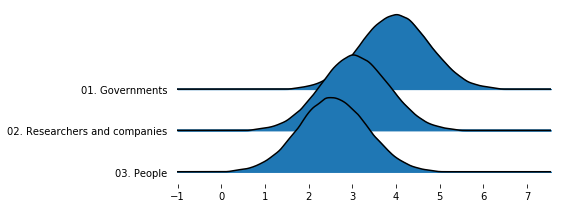

In [6]:
%matplotlib inline

fig, axes = joypy.joyplot(df, by="Actor",figsize=(8,3))